In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasibullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasibullah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasibullah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Generate Textual Feedback

In [1]:
import pandas as pd


file_path = 'Ratings.csv'  
df = pd.read_csv(file_path)

# Map ratings to textual feedback
def rating_to_text(rating):
    if rating == 0:
        return "The user gave this book a very poor rating."
    elif rating == 1:
        return "The user disliked this book."
    elif rating == 2:
        return "The user found this book below average."
    elif rating == 3:
        return "The user thought this book was average."
    elif rating == 4:
        return "The user liked this book."
    elif rating == 5:
        return "The user loved this book."
    else:
        return "The user gave an undefined rating."

# Generate descriptive text
df['text'] = df.apply(lambda row: f"User {row['User-ID']} rated the book with ISBN {row['ISBN']}. {rating_to_text(row['Book-Rating'])}", axis=1)

# Save the generated textual data for LLM pre-training
df[['text']].to_csv('amazon_ratings_pretraining_text.csv', index=False, header=False)


# Data Analysis

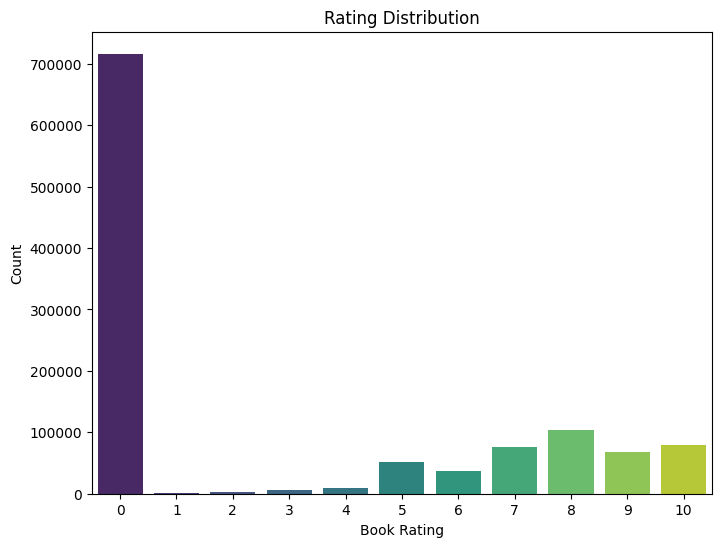

In [3]:
# Data analysis: Rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=df, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

In [4]:
# Aggregate analysis: Average rating per user
user_avg_rating = df.groupby('User-ID')['Book-Rating'].mean().sort_values(ascending=False)
print("\nTop 5 Users by Average Rating:")
print(user_avg_rating.head())


Top 5 Users by Average Rating:
User-ID
162951    10.0
21620     10.0
210063    10.0
250956    10.0
21611     10.0
Name: Book-Rating, dtype: float64


# Text Preprocessing

In [8]:
df['feedback_text'] = df.apply(
    lambda row: f"User {row['User-ID']} rated the book with ISBN {row['ISBN']}. {rating_to_text(row['Book-Rating'])}", axis=1
)

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply text preprocessing
df['cleaned_feedback'] = df['feedback_text'].apply(preprocess_text)

# Save cleaned feedback for LLM pre-training
df[['cleaned_feedback']].to_csv('cleaned_amazon_feedback.txt', index=False, header=False)


In [10]:
print(df.columns)

Index(['User-ID', 'ISBN', 'Book-Rating', 'text', 'feedback_text',
       'cleaned_feedback'],
      dtype='object')


# Visualize word frequency

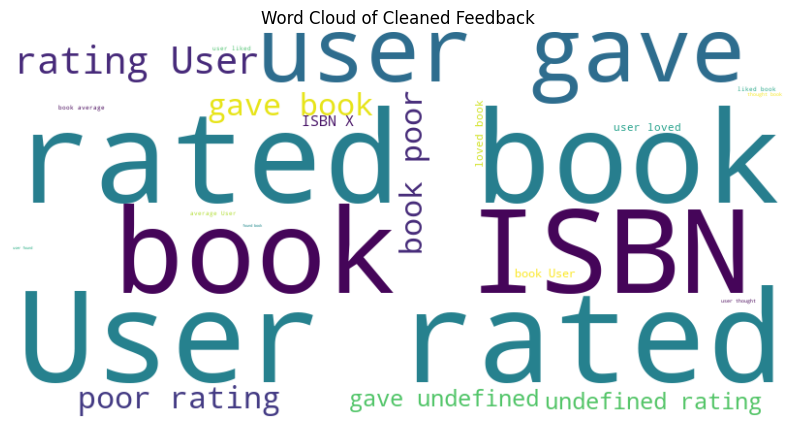

In [11]:
from wordcloud import WordCloud

all_words = ' '.join(df['cleaned_feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Feedback")
plt.show()